# CODIGO DE EJEMPLO DE USO DE RANDOM FOREST

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("test.csv")

In [4]:
x = df.iloc[:, [2, 3]]
y = df.iloc[:, -1]

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/4, random_state= 0)

In [7]:
# aplicamos la clasificacion con random forest
# sklearn.ensemble contiene los aprendizajes en conjunto 
from sklearn.ensemble import RandomForestClassifier
clasificador = RandomForestClassifier(n_estimators=1000, # numero de arboles de desicion
                                        criterion="entropy",
                                        random_state=0,
                                        max_depth=4, # eso lo agregué yo pa no tener tanto overfitting
                                        # es el máximo de veces que se puede dividir una rama del arbol de desicion
                                        )
clasificador.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=1000,
                       random_state=0)

In [8]:
# predecimos las compras
y_pred = clasificador.predict(x_test)

In [9]:
# veo que tal fueron los resultados con la matriz de confusion
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_pred, y_test)
confusionMatrix

array([[64,  2],
       [ 4, 30]])

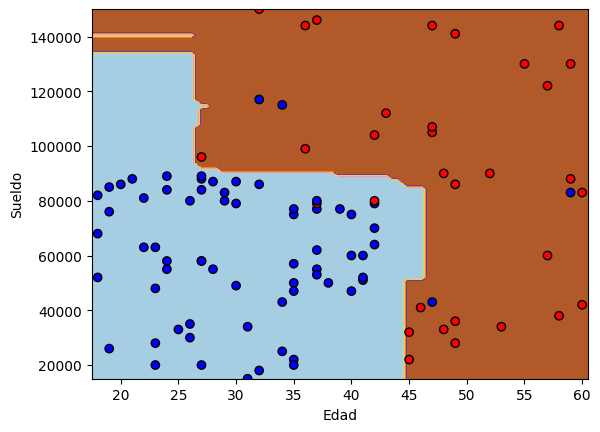

In [10]:
# podemos graficar los resultados con el metodo svm con la misma funcion que instalé antes
# en la clase habia mucho texto, pero encontré esta funcion en sklearn () advertencia, tener cuidado porque está en la rama inestable de sklearn (version 1.1 creo)
# la version estable es 1.0.2 creo, instalé la version inestable pa usar esto
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    clasificador,
    x_train,
    cmap=plt.cm.Paired,
    response_method="predict",
    #plot_method="pcolormesh",
    #shading="auto",
    eps=0.5,
)

# lo anterior solo plotea la linea y colorea los espacios, aqui pongo los puntos
# creo una lista de colores a partir de y_test
colores = ["red" if x != 0 else "blue" for x in y_test]
# aqui grafico usando la lista de colores (esdecolors="k" esta de bonito)
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], color = colores, edgecolors="k")
plt.xlabel("Edad")
plt.ylabel("Sueldo")
plt.show()